In [2]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import wave
import contextlib
import librosa
import numpy as np
import os
import pandas as pd
import soundfile
import sys
import os
import numpy as np
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
import matplotlib.pyplot as plt
from librosa import display   
import IPython.display as ipd
import wave
import contextlib
import joblib

/home/jupyter-reynaldo_delimajr/.local/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Import the data

In [3]:
## LOAD MEL DATA
f = open('IEMOCAP_Data/Processed/audio_features_mel_2d', 'rb')
mel = joblib.load(f)
f.close()

In [4]:
## LOAD MFCC DATA
f = open('IEMOCAP_Data/Processed/audio_features_mfcc_2d', 'rb')
mfcc = joblib.load(f)
f.close()

In [5]:
## LOAD LABEL DATA
f = open('IEMOCAP_Data/Processed/labels', 'rb')
labels = joblib.load(f)
f.close()

In [6]:
labels_backup = labels

### Changing the labels
To increase the amount of 'happiness' label, we upscale it by combining excited, and 'frustration' with 'sadness'.

In [7]:
for i in range(len(labels)):
    if labels[i] == 2:
        labels[i]  = 1
    elif labels[i]  == 3:
        labels[i]  = 2
    elif labels[i]  == 4:
        labels[i]  = 2
    elif labels[i]  == 5:
        labels[i]  = 3
    elif labels[i]  == 6:
        labels[i]  = 4
    elif labels[i]  == 7:
        labels[i]  = 5

In [8]:
for i in range(len(labels)):
    if labels[i] == 8:
        print(labels[i])

8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [9]:
labels_modified = labels
labels_1 = labels

In [10]:
labels_new = []
X_new_mel = []
X_new_mfcc = []
for i in range(len(labels)):
    if labels[i] != 8:
        if labels[i] != None:
            labels_new.append(labels[i])
            X_new_mel.append(mel[i])
            X_new_mfcc.append(mfcc[i])

In [11]:
labels_backup_no_eight = labels_new
mel_backup_no_eight = X_new_mel
mfcc_back_no_eight = X_new_mfcc

In [12]:
len(X_new_mel)

3762

In [13]:
labels_new_array = np.array(labels_new)
print(np.unique(labels_new_array, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([ 235,  946, 1509,    8,   60, 1004]))


In [14]:
X_mel = []
X_mfcc = []
X_label = []

In [15]:
x_anger_mel = []
x_fear_mel = []
x_surprise_mel = []

x_anger_mfcc = []
x_fear_mfcc = []
x_surprise_mfcc = []

for i in range(len(X_new_mel)):
    if(labels_new[i] == 3): #fear
        x_fear_mel.append(X_new_mel[i])
        x_fear_mfcc.append(X_new_mfcc[i])
    elif(labels_new[i] == 4): #surprise
        x_surprise_mel.append(X_new_mel[i])
        x_surprise_mfcc.append(X_new_mfcc[i])
    elif(labels_new[i] == 0): #anger
        x_anger_mel.append(X_new_mel[i])
        x_anger_mfcc.append(X_new_mfcc[i])

### We upscale the data to 500 each label.
to make sure that every label has the same amount of uterances during the training we upsampled anger, fear and surpirse for all utterances to reach a minimum number of 500 


In [16]:
#anger 
for i in range(3):
    for i in range(len(x_anger_mel)):
        X_new_mel.append(x_anger_mel[i])
        X_new_mfcc.append(x_anger_mfcc[i])
        labels_new.append(0)
#fear
for i in range(65):
    for i in range(len(x_fear_mel)):
        X_new_mel.append(x_fear_mel[i])
        X_new_mfcc.append(x_fear_mfcc[i])
        labels_new.append(3)
#surprise
for i in range(9):
    for i in range(len(x_surprise_mel)):
        X_new_mel.append(x_surprise_mel[i])
        X_new_mfcc.append(x_surprise_mfcc[i])
        labels_new.append(4)

In [17]:
X_mel_data_500 = []
X_mfcc_data_500 = []
labels_new_data_500 = []

ang_ctr = 0
hap_ctr = 0
sad_ctr = 0
fea_ctr = 0
sur_ctr = 0
neu_ctr = 0 

for i in range(len(X_new_mel)):
    if labels_new[i] == 0:
        if ang_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            ang_ctr += 1
    if labels_new[i] == 1:
        if hap_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            hap_ctr += 1
    if labels_new[i] == 2:
        if sad_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            sad_ctr += 1
    if labels_new[i] == 3:
        if fea_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            fea_ctr += 1
    if labels_new[i] == 4:
        if sur_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            sur_ctr += 1
    if labels_new[i] == 5:
        if neu_ctr < 500:
            X_mel_data_500.append(X_new_mel[i])
            X_mfcc_data_500.append(X_new_mfcc[i])
            labels_new_data_500.append(labels_new[i])
            neu_ctr += 1

### Cell under shows that each label has a 500 utterances within

In [18]:
labels_new_array = np.array(labels_new_data_500)
print(np.unique(labels_new_array, return_counts=True))

(array([0, 1, 2, 3, 4, 5]), array([500, 500, 500, 500, 500, 500]))


In [19]:
print(ang_ctr)

500


In [20]:
len(x_fear_mfcc)

8

#### Save the data to binary file
In order for the team to access the data a lot easier in future trainings the labels, mel-spectrogram, and mfcc features of each utterances are saved within seperated binary files

In [47]:
f = open('IEMOCAP_Data/Try/wav_3000', 'rb')
wav_names = joblib.load(f)
f.close()

In [48]:
labels[246]

5

In [52]:
# 3 and 4
pos_fear = []
pos_surprise = []

for i in range(len(labels)):
    if(labels[i] == 3):
        pos_fear.append(i)
    elif(labels[i] == 4):
        pos_surprise.append(i)

In [53]:
pos_fear

[1502, 3706, 4351, 4352, 4364, 4365, 4366, 4368]

In [55]:
# cross check with wav files to check if they are more than 15 sec.

#### Import the data

In [21]:
### LOAD EVERYTHING
f = open('IEMOCAP_Data/Processed2D/labels_500_2d', 'rb')
labels_new_data_500 = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Processed2D/mel_500_2d', 'rb')
X_mel_data_500 = joblib.load(f)
f.close()

f = open('IEMOCAP_Data/Processed2D/mfcc_500_2d', 'rb')
X_mfcc_data_500 = joblib.load(f)
f.close()


### We start experimentation now

Both mfcc and mel spectrogram features are splited with a ratio of 70-30 using the train_test_split from sklearn.model_selection

In [22]:
from sklearn.model_selection import train_test_split

Split the <b>mel spectrogram </b> features




In [23]:
X_train_mel, X_test_mel, y_train_mel, y_test_mel = train_test_split(np.array(X_mel_data_500), labels_new_data_500 , test_size=0.3, random_state=7)

Split the <b>mfcc </b> features

In [24]:
X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(np.array(X_mfcc_data_500), labels_new_data_500 , test_size=0.3, random_state=7)

### We store the train and test data for both mel and mfcc

In [25]:
# Mel
joblib.dump(X_train_mel, 'IEMOCAP_Data/Data_30_sec/X_train_mel', compress=0, protocol=None, cache_size=None)
joblib.dump(X_test_mel, 'IEMOCAP_Data/Data_30_sec/X_test_mel', compress=0, protocol=None, cache_size=None)
joblib.dump(y_train_mel, 'IEMOCAP_Data/Data_30_sec/y_train_mel', compress=0, protocol=None, cache_size=None)
joblib.dump(y_test_mel, 'IEMOCAP_Data/Data_30_sec/y_test_mel', compress=0, protocol=None, cache_size=None)

# mfcc
joblib.dump(X_train_mfcc, 'IEMOCAP_Data/Data_30_sec/X_train_mfcc', compress=0, protocol=None, cache_size=None)
joblib.dump(X_test_mfcc, 'IEMOCAP_Data/Data_30_sec/X_test_mfcc', compress=0, protocol=None, cache_size=None)
joblib.dump(y_train_mfcc, 'IEMOCAP_Data/Data_30_sec/y_train_mfcc', compress=0, protocol=None, cache_size=None)
joblib.dump(y_test_mfcc, 'IEMOCAP_Data/Data_30_sec/y_test_mfcc', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Data/y_test_mfcc']

<b> 1D MFCC: </b>                               
TDNN + LSTM                         
<b> 2D MELSPECTROGRAM: </b>                
IMAGE RECOG CNN                

### Imported the libraries needed for model building

In [26]:
#import segmentation_models as sm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks 

from kerassurgeon.operations  import delete_layer, insert_layer
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling1D, GlobalMaxPooling2D
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, GlobalMaxPooling2D, MaxPooling1D, GlobalMaxPooling1D, Reshape
from tensorflow.keras.layers import BatchNormalization, LSTM
from keras_self_attention import SeqSelfAttention

In [27]:
import numpy as np

In [28]:
np.__version__
np.__path__

['/opt/tljh/user/lib/python3.7/site-packages/numpy']

In [29]:
X_train_mel.shape

(2100, 128, 872)

### Turn Y data to onehot

this is to make sure that some models require the Y or the labels to be encoded as onehot format, so we decided to transform each labels into onehot format

##### example of regular Y data are
y = 1 or y = 5

##### example of onehot encoded Y data are
y = [ 0, 1, 0, 0, 0, 0 ]  or  y = [ 0, 0, 0, 0, 0, 1 ]

In [38]:
y_onehot_train_mel = y_train_mel
y_onehot_test_mel = y_test_mel

y_onehot_train_mfcc = y_train_mfcc
y_onehot_test_mfcc = y_test_mfcc

In [39]:
y_onehot_train_mel = pd.get_dummies(y_onehot_train_mel)
y_onehot_test_mel = pd.get_dummies(y_onehot_test_mel)

y_onehot_train_mfcc = pd.get_dummies(y_onehot_train_mfcc)
y_onehot_test_mfcc = pd.get_dummies(y_onehot_test_mfcc)

In [40]:
y_onehot_train_mel = np.asarray(y_onehot_train_mel).astype('int8')
y_onehot_test_mel  = np.asarray(y_onehot_test_mel).astype('int8')

y_onehot_train_mfcc = np.asarray(y_onehot_train_mfcc).astype('int8')
y_onehot_test_mfcc  = np.asarray(y_onehot_test_mfcc).astype('int8')

In [41]:
y_onehot_train_mfcc

array([[0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int8)

### A simple function to calculate for the f1-loss

In [46]:
def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

### ResNet50 using Mel Spectrogram features

We imported ResNet50 through tensorflow.keras with the input shape of (128,872,1) basing from the mel-spectrogram shape we have and we also expanded the dimesion of the X data or the mel-spectrogram to 3 dimensional in order for it to fully fit the ResNet's training 

###### 128 = number of Mel spectrogram features
###### 872 = time length
###### 1 = number of labels it contains

In [48]:
X_traincnn_mel_2d = np.expand_dims(X_train_mel, axis = 3)
X_testcnn_mel_2d = np.expand_dims(X_test_mel, axis = 3)

In [49]:
X_traincnn_mel_2d.shape

(2100, 128, 872, 1)

In [68]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(128, 872, 1),
                   pooling='max',classes=6,  weights=None)
#for layer in pretrained_model.layers:
        #layer.trainable=False

resnet_model.add(pretrained_model)

In [69]:
resnet_model.add(Flatten())

In [70]:
resnet_model.add(Dense(6, activation='softmax'))

In [71]:
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23581440  
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 12294     
Total params: 23,593,734
Trainable params: 23,540,614
Non-trainable params: 53,120
_________________________________________________________________


In [72]:
opt2 = tf.keras.optimizers.Adam(lr=0.001)
resnet_model.compile(optimizer=opt2,loss='categorical_crossentropy',metrics=['categorical_accuracy', f1_loss])

In [75]:
history = resnet_model.fit(X_traincnn_mel_2d, y_onehot_train_mel, batch_size=50, epochs=50, validation_data=(X_testcnn_mel_2d, y_onehot_test_mel))

Epoch 1/50
42/42 [==============================] - 1174s 28s/step - loss: 1.4946 - categorical_accuracy: 0.4229 - f1_loss: 0.6793 - val_loss: 1.7223 - val_categorical_accuracy: 0.3222 - val_f1_loss: 0.7910
Epoch 2/50
42/42 [==============================] - 1176s 28s/step - loss: 1.2673 - categorical_accuracy: 0.4952 - f1_loss: 0.6263 - val_loss: 1.4298 - val_categorical_accuracy: 0.4367 - val_f1_loss: 0.7068
Epoch 3/50
42/42 [==============================] - 1184s 28s/step - loss: 1.2790 - categorical_accuracy: 0.5052 - f1_loss: 0.6082 - val_loss: 1.3469 - val_categorical_accuracy: 0.4422 - val_f1_loss: 0.6778
Epoch 4/50
42/42 [==============================] - 1184s 28s/step - loss: 1.3758 - categorical_accuracy: 0.5333 - f1_loss: 0.5791 - val_loss: 1.3549 - val_categorical_accuracy: 0.4533 - val_f1_loss: 0.6745
Epoch 5/50
42/42 [==============================] - 1192s 28s/step - loss: 1.1164 - categorical_accuracy: 0.5605 - f1_loss: 0.5406 - val_loss: 1.3344 - val_categorical_accu

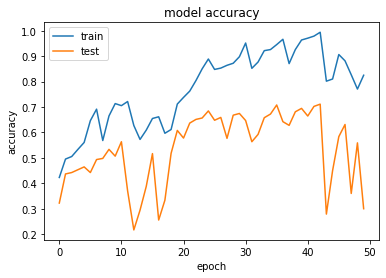

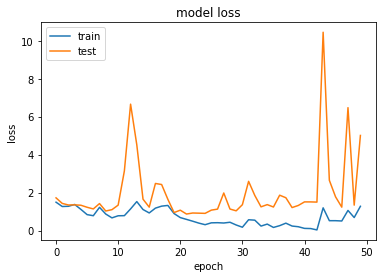

In [80]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [123]:
X_traincnn_mel_2d[0]

array([[[9.51713600e+07],
        [1.10864656e+08],
        [5.94689280e+07],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[6.65804160e+07],
        [1.20941816e+08],
        [6.16565480e+07],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[1.94081800e+07],
        [3.61214200e+07],
        [1.95499600e+07],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       ...,

       [[8.49710254e+03],
        [2.63126660e+03],
        [5.28204346e+02],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[9.26032324e+03],
        [3.03422168e+03],
        [7.30244080e+02],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[7.87413232e+03],
        [2.39573999e+03],
        [6.35567261e+02],
        ...,
        [0.00000000e+00],
        [0.0000

### ResNet50 using MFCC features

We imported ResNet50 through tensorflow.keras with the input shape of (40,872,1) basing from the mel-spectrogram shape we have and we also expanded the dimesion of the X data or the mfcc to 3 dimensional in order for it to fully fit the ResNet's training

###### 40 = number of mfcc features
###### 872 = time length
###### 1 = number of labels it contains

In [81]:
X_traincnn_mfcc_2d = np.expand_dims(X_train_mfcc, axis = 3)
X_testcnn_mfcc_2d = np.expand_dims(X_test_mfcc, axis = 3)

In [104]:
resnet_model_mfcc = Sequential()

pretrained_model_mfcc= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(40, 872, 1),
                   pooling='max',classes=6,  weights=None)
#for layer in pretrained_model.layers:
        #layer.trainable=False

resnet_model_mfcc.add(pretrained_model_mfcc)

In [105]:
resnet_model_mfcc.add(Flatten())
resnet_model_mfcc.add(Dense(6, activation='softmax'))
resnet_model_mfcc.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23581440  
_________________________________________________________________
flatten_9 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 12294     
Total params: 23,593,734
Trainable params: 23,540,614
Non-trainable params: 53,120
_________________________________________________________________


In [106]:
opt2 = tf.keras.optimizers.Adam(lr=0.001)

In [107]:
resnet_model_mfcc.compile(optimizer=opt2,loss='categorical_crossentropy',metrics=['categorical_accuracy', f1_loss])

In [117]:
history_mfcc_2 = resnet_model_mfcc.fit(X_traincnn_mfcc_2d, y_onehot_train_mfcc, batch_size=50, epochs=50, validation_data=(X_testcnn_mfcc_2d, y_onehot_test_mfcc))

Epoch 1/50
42/42 [==============================] - 902s 22s/step - loss: 1.9734 - categorical_accuracy: 0.2400 - f1_loss: 0.8128 - val_loss: 50.1066 - val_categorical_accuracy: 0.1567 - val_f1_loss: 0.9462
Epoch 2/50
42/42 [==============================] - 901s 21s/step - loss: 2.3454 - categorical_accuracy: 0.2562 - f1_loss: 0.8144 - val_loss: 430.5458 - val_categorical_accuracy: 0.1600 - val_f1_loss: 0.9461
Epoch 3/50
42/42 [==============================] - 916s 22s/step - loss: 2.0272 - categorical_accuracy: 0.3138 - f1_loss: 0.7794 - val_loss: 73.2639 - val_categorical_accuracy: 0.1856 - val_f1_loss: 0.9455
Epoch 4/50
42/42 [==============================] - 901s 21s/step - loss: 1.7123 - categorical_accuracy: 0.3743 - f1_loss: 0.7482 - val_loss: 30.7067 - val_categorical_accuracy: 0.1700 - val_f1_loss: 0.9514
Epoch 5/50
42/42 [==============================] - 894s 21s/step - loss: 1.5120 - categorical_accuracy: 0.4305 - f1_loss: 0.6909 - val_loss: 4.2534 - val_categorical_accu

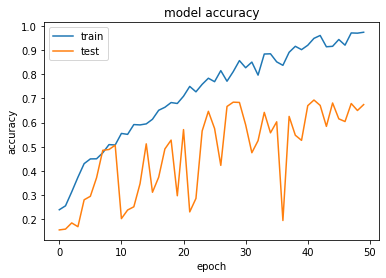

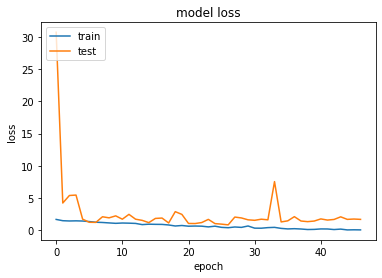

In [120]:
plt.plot(history_mfcc_2.history['categorical_accuracy'])
plt.plot(history_mfcc_2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_mfcc_2.history['loss'][3:])
plt.plot(history_mfcc_2.history['val_loss'][3:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

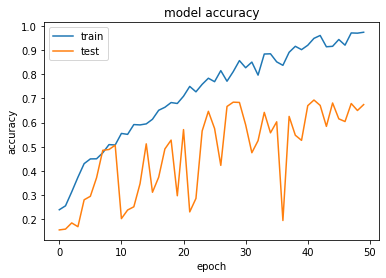

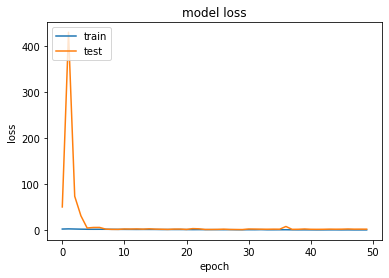

In [121]:
plt.plot(history_mfcc_2.history['categorical_accuracy'])
plt.plot(history_mfcc_2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_mfcc_2.history['loss'])
plt.plot(history_mfcc_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()